# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Data Loading and Understanding

## Loading Data

In [2]:
df_original=pd.read_csv("credit_scoring.csv")

In [3]:
df = df_original.copy()

In [4]:
df

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan


## Understanding Data

**Description of All features**:

(1). Age: This feature represents the age of the individual.

(2). Gender: This feature captures the gender of the individual.

(3). Marital Status: This feature denotes the marital status of the individual.

(4). Education Level: This feature represents the highest level of education attained by the individual.

(5). Employment Status: This feature indicates the current employment status of the individual.

(6). Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.

(7). Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.

(8). Number of Credit Accounts: It represents the count of active credit accounts the person holds.

(9). Loan Amount: It indicates the monetary value of the loan.

(10). Interest Rate: This feature represents the interest rate associated with the loan.

(11). Loan Term: This feature denotes the duration or term of the loan.

(12). Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

# Indexing with "ID" Column


In [5]:
df.reset_index(inplace=True)
# Rename the 'index' column to new-name
df.rename(columns={'index': 'ID'}, inplace=True)
df["ID"]=df["ID"]+1
display(df)

,ID,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,1,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,2,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,3,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,4,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,5,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,997,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,998,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,999,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan


# Data Overview

In [6]:
# displaying head of df
df.head()

,ID,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,1,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,2,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,3,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,4,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,5,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [7]:
# displaying head of df
df.tail()

,ID,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
995,996,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,997,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,998,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,999,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan
999,1000,37,Female,Married,Master,Self-Employed,0.17,1028.0,5,4182000,9.34,24,Auto Loan


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1000 non-null   int64  
 1   Age                        1000 non-null   int64  
 2   Gender                     1000 non-null   object 
 3   Marital Status             1000 non-null   object 
 4   Education Level            1000 non-null   object 
 5   Employment Status          1000 non-null   object 
 6   Credit Utilization Ratio   1000 non-null   float64
 7   Payment History            1000 non-null   float64
 8   Number of Credit Accounts  1000 non-null   int64  
 9   Loan Amount                1000 non-null   int64  
 10  Interest Rate              1000 non-null   float64
 11  Loan Term                  1000 non-null   int64  
 12  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 

In [9]:
df.isnull().sum()

ID                           0
Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [10]:
df.describe()

,ID,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,288.819436,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,1.000000,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,250.750000,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,500.500000,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,750.250000,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,1000.000000,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


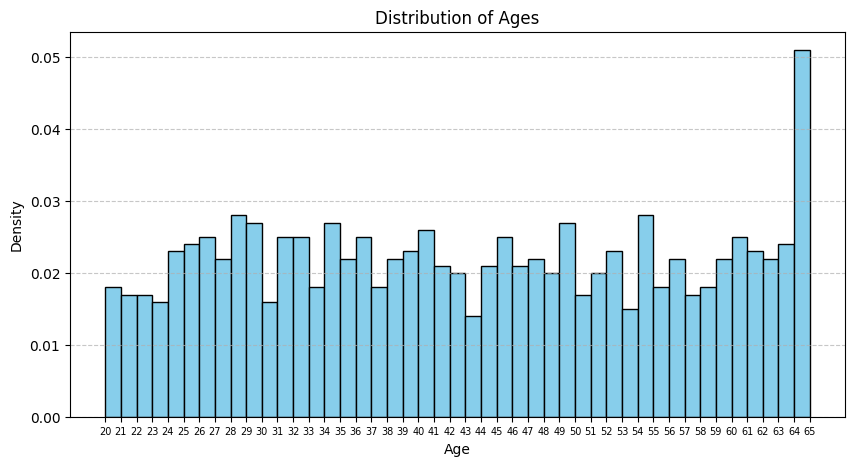

In [11]:
# Plotting the histogram of ages
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=sorted(df['Age'].unique()), density=True, color='skyblue', edgecolor='black', alpha=1)
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(np.arange(df['Age'].min(), df['Age'].max() + 1), fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Ages')
plt.show()


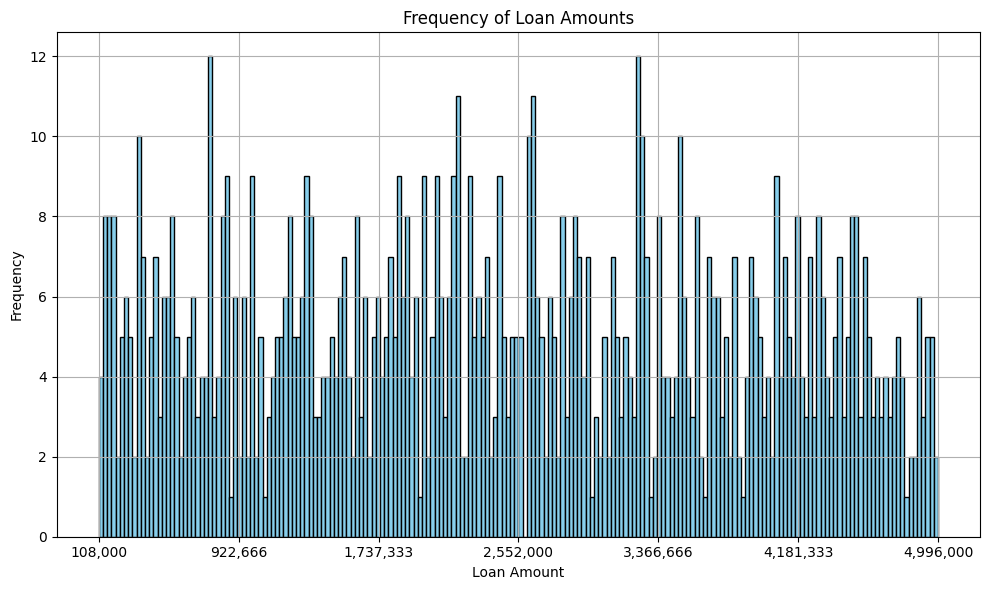

In [12]:

# Plot a histogram of loan amounts with custom tick labels on the x-axis
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['Loan Amount'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Amounts')

# Customize tick labels on the x-axis to display loan amounts in a readable format
loan_amounts = df['Loan Amount']
x_ticks = np.linspace(loan_amounts.min(), loan_amounts.max(), num=7)  # Adjust num as needed
x_tick_labels = [f'{int(x):,}' for x in x_ticks]  # Format tick labels as integers with thousands separators
plt.xticks(x_ticks, x_tick_labels)

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [13]:
q = df.columns

In [14]:
print(df['Gender'].value_counts())

Gender
Male      501
Female    499
Name: count, dtype: int64


['Gender', 'Marital Status', 'Education Level', 'Employment Status', 'Loan Term', 'Type of Loan']
Gender Details:
Gender
Male      501
Female    499
Name: count, dtype: int64


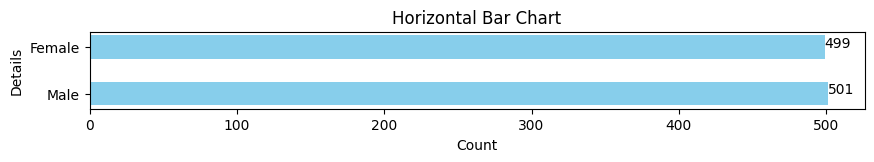



Marital Status Details:
Marital Status
Married     350
Divorced    326
Single      324
Name: count, dtype: int64


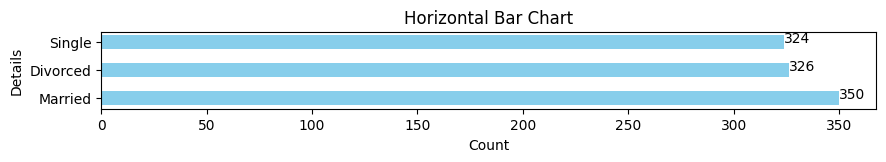



Education Level Details:
Education Level
Master         262
High School    250
PhD            245
Bachelor       243
Name: count, dtype: int64


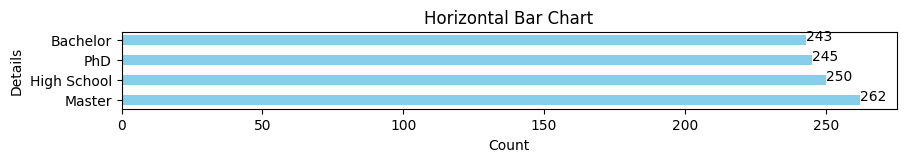



Employment Status Details:
Employment Status
Self-Employed    347
Employed         328
Unemployed       325
Name: count, dtype: int64


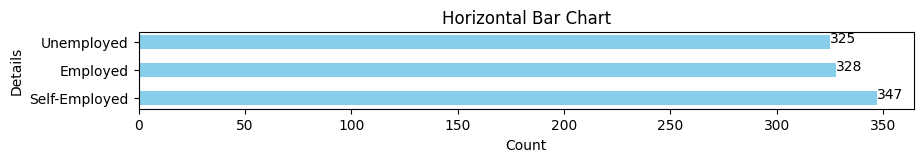



Loan Term Details:
Loan Term
60    234
48    205
12    199
36    181
24    181
Name: count, dtype: int64


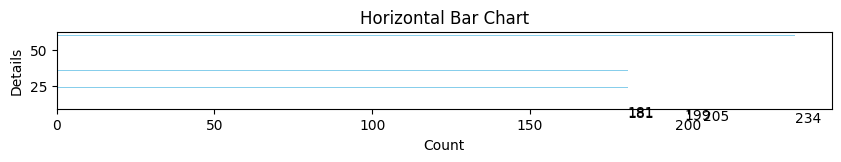



Type of Loan Details:
Type of Loan
Auto Loan        348
Home Loan        328
Personal Loan    324
Name: count, dtype: int64


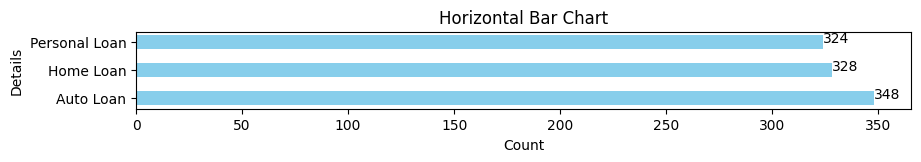

In [15]:

a = []
for r in df.columns:
    if df[r].nunique()<10:
        a.append(r)
print(a)

for ab in a:
  print(f"\033[1m\033[91m{ab} Details:\033[0m")
  x=(f"{ab}_status_count")
  x = df[f'{ab}'].value_counts()
  print(x)
  plt.figure(figsize=(10, 1))
  plt.barh(x.index, x.values, height=0.5, color='skyblue')
  plt.xlabel('Count')
  plt.ylabel('Details')
  plt.title('Horizontal Bar Chart')
  for index, value in enumerate(x.values):
    plt.text(value, index, str(value))
  plt.show()
  print("\n")

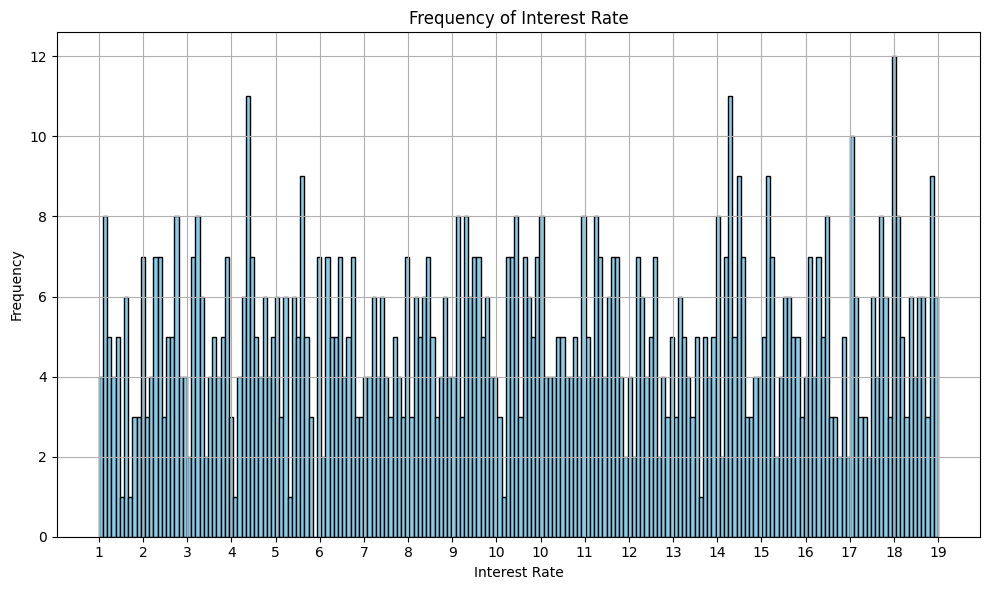

In [16]:
# Plot a histogram of 	Interest Rate with custom tick labels on the x-axis
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['Interest Rate'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Frequency of Interest Rate')

# Customize tick labels on the x-axis to display loan amounts in a readable format
interest_rate = df['Interest Rate']
x_ticks = np.linspace(interest_rate.min(), interest_rate.max(), num=20)  # Adjust num as needed
x_tick_labels = [f'{int(x):,}' for x in x_ticks]  # Format tick labels as integers with thousands separators
plt.xticks(x_ticks, x_tick_labels)

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [17]:
# Group by unique combinations and count occurrences
unique_combinations = df.groupby(["Gender", "Marital Status", "Employment Status", "Education Level", "Type of Loan"]).size()
unique_combinations = unique_combinations.reset_index(name='Count')
pd.set_option('display.expand_frame_repr', False)

# Create a new column to store the list of IDs
unique_combinations['ID List'] = ''

# Iterate over unique combinations DataFrame
for index, row in unique_combinations.iterrows():
    # Filter the original DataFrame to find IDs with the current combination
    filtered_df = df[(df['Gender'] == row['Gender']) &
                     (df['Marital Status'] == row['Marital Status']) &
                     (df['Employment Status'] == row['Employment Status']) &
                     (df['Education Level'] == row['Education Level']) &
                     (df['Type of Loan'] == row['Type of Loan'])]

    # Get the list of IDs and store it in the 'ID List' column
    id_list = filtered_df['ID'].tolist()
    unique_combinations.at[index, 'ID List'] = id_list

# Display the count table
print("Combinations Table:")
print(unique_combinations)



Combinations Table:
     Gender Marital Status Employment Status Education Level   Type of Loan  Count                    ID List
0    Female       Divorced          Employed        Bachelor      Auto Loan      3            [642, 687, 873]
1    Female       Divorced          Employed        Bachelor      Home Loan      5  [182, 448, 537, 574, 640]
2    Female       Divorced          Employed        Bachelor  Personal Loan      2                 [184, 444]
3    Female       Divorced          Employed     High School      Auto Loan      3            [280, 720, 953]
4    Female       Divorced          Employed     High School      Home Loan      3             [73, 414, 415]
..      ...            ...               ...             ...            ...    ...                        ...
209    Male         Single        Unemployed          Master      Home Loan      4       [158, 379, 614, 908]
210    Male         Single        Unemployed          Master  Personal Loan      5   [93, 107, 251, 

In [18]:
display(unique_combinations)

,Gender,Marital Status,Employment Status,Education Level,Type of Loan,Count,ID List
0,Female,Divorced,Employed,Bachelor,Auto Loan,3,"[642, 687, 873]"
1,Female,Divorced,Employed,Bachelor,Home Loan,5,"[182, 448, 537, 574, 640]"
2,Female,Divorced,Employed,Bachelor,Personal Loan,2,"[184, 444]"
3,Female,Divorced,Employed,High School,Auto Loan,3,"[280, 720, 953]"
4,Female,Divorced,Employed,High School,Home Loan,3,"[73, 414, 415]"
...,...,...,...,...,...,...,...
209,Male,Single,Unemployed,Master,Home Loan,4,"[158, 379, 614, 908]"
210,Male,Single,Unemployed,Master,Personal Loan,5,"[93, 107, 251, 769, 913]"
211,Male,Single,Unemployed,PhD,Auto Loan,4,"[190, 272, 605, 960]"
212,Male,Single,Unemployed,PhD,Home Loan,4,"[326, 774, 935, 941]"


In [19]:
#Confirming the number of total cases (sum of counts) i.e 1000

sum_last_column = unique_combinations.iloc[:, -2].sum()
print("Sum of values in the last column:", sum_last_column)

Sum of values in the last column: 1000


In [20]:
#Groupby custom choice of features here:
unique_combinations2 = df.groupby([ 'Education Level', 'Type of Loan']).size()
unique_combinations2 = unique_combinations2.reset_index(name='Count')
pd.set_option('display.max_columns', None)
print("Unique Combinations:")
print(unique_combinations2)
print("\n")

#Filter the table with specific column values here:
filtered_df = unique_combinations2.loc[unique_combinations2['Type of Loan'] == 'Personal Loan']
print("Filtered Table:\n",filtered_df)



Unique Combinations:
   Education Level   Type of Loan  Count
0         Bachelor      Auto Loan     87
1         Bachelor      Home Loan     80
2         Bachelor  Personal Loan     76
3      High School      Auto Loan     90
4      High School      Home Loan     79
5      High School  Personal Loan     81
6           Master      Auto Loan     89
7           Master      Home Loan     87
8           Master  Personal Loan     86
9              PhD      Auto Loan     82
10             PhD      Home Loan     82
11             PhD  Personal Loan     81


Filtered Table:
    Education Level   Type of Loan  Count
2         Bachelor  Personal Loan     76
5      High School  Personal Loan     81
8           Master  Personal Loan     86
11             PhD  Personal Loan     81


In [21]:
newfiltertable = df.groupby(['Education Level', 'Type of Loan']).size().reset_index(name='count')
newfiltertable = newfiltertable[newfiltertable['Type of Loan'] == 'Personal Loan']
newfiltertable

,Education Level,Type of Loan,count
2,Bachelor,Personal Loan,76
5,High School,Personal Loan,81
8,Master,Personal Loan,86
11,PhD,Personal Loan,81


In [22]:
display(df)

,ID,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,1,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,2,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,3,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,4,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,5,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,997,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,998,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,999,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan


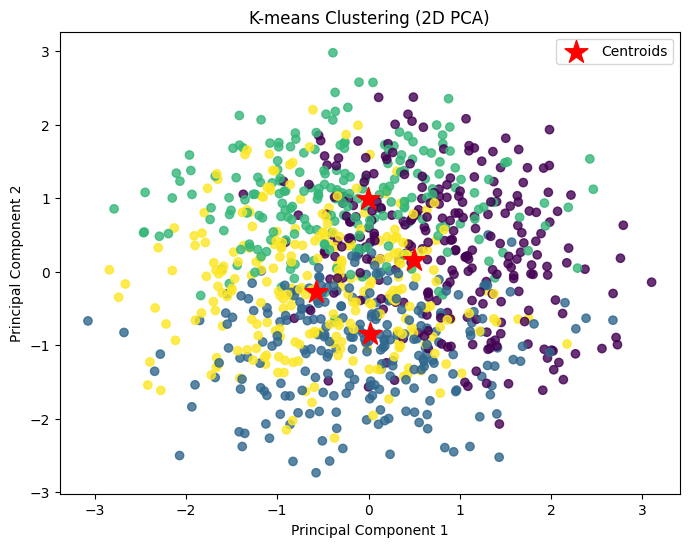

In [23]:


# Assuming 'df' is your DataFrame with the data

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Preprocessing steps
# Here, we'll standardize the data using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

# Step 1: Prepare your data
X = scaled_df

# Step 2: Choose the number of clusters (K)
K = 4  # Using 4 clusters

# Step 3: Instantiate and fit the KMeans model
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X)

# Step 4: Retrieve cluster assignments and centroids
labels = kmeans.labels_  # Cluster assignments
centroids = kmeans.cluster_centers_  # Cluster centroids

# Step 5: Interpret the results
# Analyze the cluster assignments and centroids to understand the grouping of data points and the characteristics of each cluster
# You can access the labels and centroids for further analysis

# Optionally, you can visualize the clustering results
# Since you have 14 columns, you may need to reduce dimensions for visualization purposes
# For instance, you can use PCA to reduce dimensionality to 2 or 3 dimensions and then visualize the clusters

# Example code for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of the data points colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='Centroids')
plt.title('K-means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [24]:
# Create a DataFrame to store cluster assignments
clustered_df = df.copy()  # Make a copy of the original DataFrame
clustered_df['Cluster'] = labels  # Add a new column for cluster assignments

# Separate data into different DataFrames based on cluster assignments
cluster_tables = []
for cluster_id in range(K):
    cluster_table = clustered_df[clustered_df['Cluster'] == cluster_id].drop(columns=['Cluster'])
    cluster_tables.append(cluster_table)

# Print the first few rows of each cluster table
for i, cluster_table in enumerate(cluster_tables):
    print(f"Cluster {i}:\n{cluster_table.head(10)}\n")

Cluster 0:
    ID  Age  Gender Marital Status Education Level Employment Status  Credit Utilization Ratio  Payment History  Number of Credit Accounts  Loan Amount  Interest Rate  Loan Term   Type of Loan
11  12   52    Male       Divorced          Master        Unemployed                      0.51            714.0                          3      3237000          15.49         60      Home Loan
12  13   58  Female         Single     High School          Employed                      0.93           1114.0                          4       586000           5.58         60  Personal Loan
13  14   51    Male       Divorced        Bachelor          Employed                      0.66           2000.0                          3      2323000          11.03         60      Auto Loan
14  15   54    Male       Divorced          Master     Self-Employed                      1.00           2371.0                          6      3775000          18.09         48  Personal Loan
18  19   61    Male     

In [25]:
# Define mapping dictionaries
education_mapping = {'High School': -1, 'Bachelor': 1, 'Master': 2, 'PhD': 2.5}
employment_mapping = {'Employed': 1.1, 'Unemployed': -1, 'Self-Employed': 1}

new_df = df.copy()

new_df['Education Level'] = new_df['Education Level'].map(education_mapping)
new_df['Employment Status'] = new_df['Employment Status'].map(employment_mapping)

# Calculate 'Credit Score' using the formula and putting it in original 'df' table
df['Credit Score'] = ((new_df['Employment Status'] * 25 +
                          (new_df['Payment History']**1.1) * 0.15 +
                          new_df['Number of Credit Accounts'] * (-0.15) +
                          new_df['Education Level'] * 20)+220)*.8

# Print the new DataFrame
display(df)


,ID,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,1,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan,939.370389
1,2,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan,757.799298
2,3,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan,963.931593
3,4,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan,534.543653
4,5,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan,406.302556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan,496.522073
996,997,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan,644.774376
997,998,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan,919.857301
998,999,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan,512.725603


In [26]:
#Checking features of Credit Score column data

df.describe()

,ID,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Credit Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.500000,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000,569.415276
std,288.819436,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274,226.120116
min,1.000000,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000,139.280000
25%,250.750000,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000,374.001180
50%,500.500000,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000,558.602448
75%,750.250000,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000,764.938032
max,1000.000000,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000,989.650646


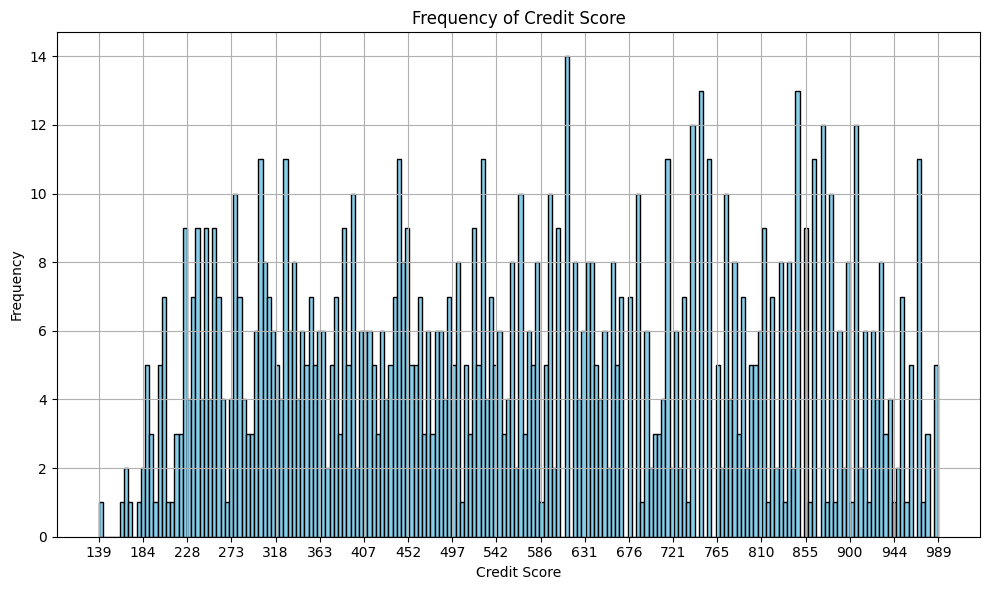

In [27]:
# Plot a histogram of credit score with custom tick labels on the x-axis
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['Credit Score'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Frequency of Credit Score')

# Customize tick labels on the x-axis to display loan amounts in a readable format
credit_score = df['Credit Score']
x_ticks = np.linspace(credit_score.min(), credit_score.max(), num=20)  # Adjust num as needed
x_tick_labels = [f'{int(x):,}' for x in x_ticks]  # Format tick labels as integers with thousands separators
plt.xticks(x_ticks, x_tick_labels)

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [28]:
# Assuming 'credit_threshold' is the desired credit score threshold
credit_threshold = 645

# Filter the DataFrame based on the credit score threshold
df2 = df[df['Credit Score'] > credit_threshold]
display(df2)

,ID,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,1,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan,939.370389
1,2,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan,757.799298
2,3,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan,963.931593
5,6,42,Male,Divorced,Master,Unemployed,0.94,2342.0,2,1536000,11.15,24,Personal Loan,798.317859
6,7,44,Female,Divorced,Bachelor,Unemployed,0.32,2800.0,1,2021000,16.61,36,Auto Loan,914.993379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,56,Female,Divorced,High School,Unemployed,0.80,2200.0,8,4499000,10.89,36,Auto Loan,709.002385
991,992,56,Male,Divorced,Bachelor,Self-Employed,0.67,2428.0,3,2283000,16.12,36,Auto Loan,846.904807
992,993,25,Female,Single,Bachelor,Unemployed,0.49,2800.0,4,1609000,17.65,12,Personal Loan,914.633379
994,995,53,Female,Single,Master,Employed,0.40,2028.0,4,2561000,3.26,36,Home Loan,750.661900


In [29]:
df.dtypes

ID                             int64
Age                            int64
Gender                        object
Marital Status                object
Education Level               object
Employment Status             object
Credit Utilization Ratio     float64
Payment History              float64
Number of Credit Accounts      int64
Loan Amount                    int64
Interest Rate                float64
Loan Term                      int64
Type of Loan                  object
Credit Score                 float64
dtype: object

In [30]:
#Number of people with credit score above threshold value
print(len(df2))

386


In [31]:
#Creating list of those people's ID
values_list = df2['ID'].tolist()
print("List of values:", values_list)

List of values: [1, 2, 3, 6, 7, 14, 15, 16, 20, 23, 24, 26, 27, 30, 42, 44, 49, 61, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 95, 98, 103, 104, 105, 109, 118, 119, 120, 122, 125, 126, 128, 130, 131, 132, 134, 136, 139, 141, 145, 148, 149, 150, 154, 155, 156, 157, 160, 170, 172, 174, 176, 178, 179, 184, 186, 187, 193, 194, 196, 198, 200, 201, 202, 204, 208, 210, 212, 213, 214, 221, 222, 224, 225, 234, 237, 241, 243, 245, 248, 250, 251, 254, 256, 265, 266, 275, 278, 279, 281, 282, 285, 286, 287, 289, 293, 296, 299, 301, 303, 305, 307, 308, 309, 311, 312, 314, 315, 317, 318, 323, 326, 327, 329, 333, 341, 342, 343, 346, 347, 351, 352, 353, 356, 357, 358, 359, 363, 364, 365, 366, 373, 374, 375, 379, 381, 382, 384, 393, 395, 396, 399, 403, 408, 410, 413, 417, 419, 420, 421, 427, 429, 432, 434, 440, 442, 443, 445, 446, 448, 452, 459, 462, 465, 468, 469, 471, 475, 478, 480, 482, 484, 485, 489, 490, 491, 492, 493, 495, 497, 499, 505, 507, 508, 509, 510, 511, 514, 527, 530, 534, 53

In [32]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex 

<Figure size 1000x600 with 0 Axes>

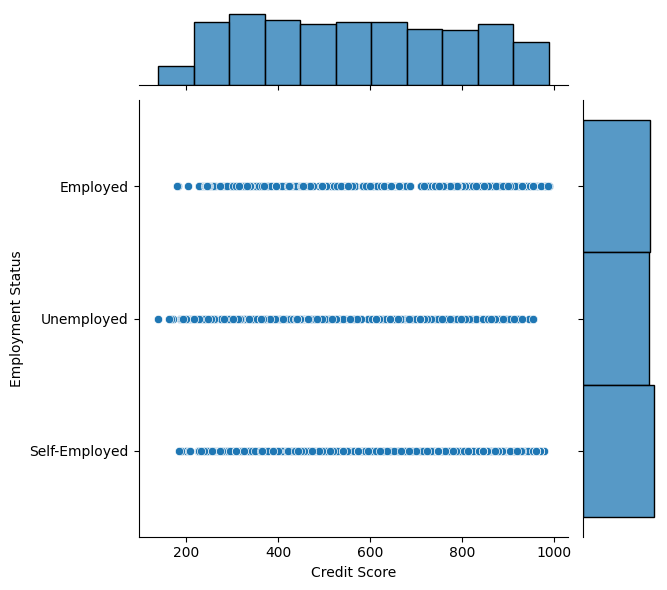

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing "Age" and "Loan Term" columns
plt.figure(figsize=(10, 6))
plot = sns.jointplot(x="Credit Score", y="Employment Status", data=df)
plt.show()

